In [4]:
# Librerias necesarias para diseñar la red neuronal y analizar los datos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import describe
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Cargar el conjunto de datos
dataset = pd.read_csv('data_elements.csv')
print(dataset.shape)
dataset.tail()

(20000, 88)


,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,element
19995,0.0,0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,5.5,Rb0.19W1O3
19996,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,5.0,Fe1Se0.82Br0.18
19997,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,5.0,Fe1Se0.8Br0.2
19998,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,5.0,Fe1Se0.7Br0.3
19999,0.0,0,0.0,0.0,0.0,0.0,0.0,0.77,0.3,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,3.1,La1Bi1S2F0.3O0.77


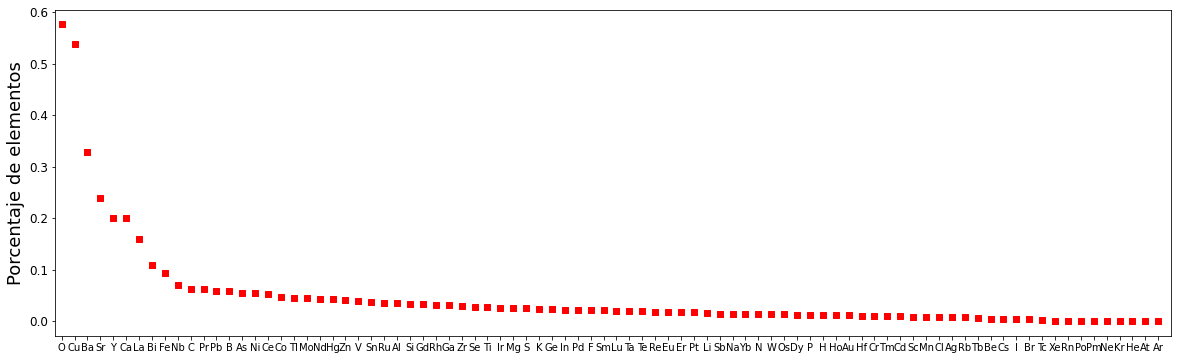

In [3]:
# Remover la columna que contiene la informacion de la temperatura crítica
target_feature = ["critical_temp"]
elements = ['element']
features = list(set(list(dataset.columns))-set(target_feature)- set(elements))

x = dataset[features].values
y = dataset[target_feature].values

# Se determina cuántos compuestos tienen determinado elemento
Elements = []
for i in range(0,86):
    Elements.append(((x[:,i] != 0.0).sum())/20000.)

Elements, features = zip(*sorted(zip(Elements,features),reverse=True))

plt.figure(figsize = (20,6))
plt.scatter(features, Elements, color = 'red', marker = 's', s =40)    
plt.xlim(xmin = -0.5, xmax=86)
plt.ylabel('Porcentaje de elementos', fontsize = 18)
plt.yticks(fontsize = 12)
plt.savefig('Compuestos.png')   

In [4]:
# Seleccionar los datos que se utilizan para entrenar la red (80%) y para evaluar (20%)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(16000, 86) (16000, 1)
(4000, 86) (4000, 1)


In [41]:
# Diseño de la red neuronal
def Model():
    # Esta red neuronal tiene 8 capas, de las cuales 6 son ocultas, la función de activación es RELU
    model = keras.Sequential([
    layers.Dense(264, input_dim = 86, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='relu')
    ])
    
    #Para optimizar el algoritmo de propagación se emplea el método de Adam de Keras
    optimizer = keras.optimizers.Adam(learning_rate = 0.001)
    
    # La función de costo que se utiliza es el error cuadrático medio
    model.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics = ['mean_squared_error'])
    return model

model = Model()
model.summary()
# Se entrena la red durante 1000 epocas con un tamaño de batch de 64
history = model.fit(xtrain, ytrain, epochs = 1000, batch_size = 64, verbose = 0)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 264)               22968     
_________________________________________________________________
dense_65 (Dense)             (None, 128)               33920     
_________________________________________________________________
dense_66 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_68 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_69 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_70 (Dense)             (None, 4)                

0.9067226910551113


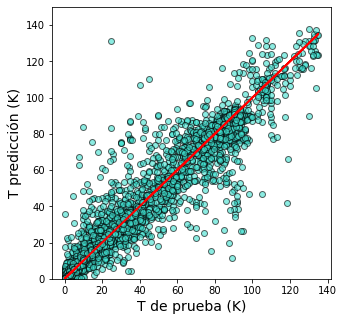

In [44]:
prediction = model.predict(xtest)
print(r2_score(ytest, prediction))

plt.figure(figsize = (5,5))
plt.plot(ytest,ytest, linewidth = 2, c = 'red')
plt.scatter(ytest, prediction, edgecolors='k', color = 'turquoise', alpha = 0.6)
plt.ylim([0,150])
plt.ylabel('T predicción (K)', fontsize = 14)
plt.xlabel('T de prueba (K)', fontsize = 14)
#plt.savefig('regresion-elementos.png')

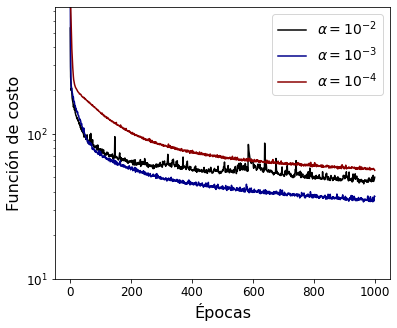

In [27]:
plt.figure(figsize = (6,5))
plt.semilogy(history1.history['loss'], color = 'k', label = r'$\alpha = 10^{-2}$')
plt.semilogy(history2.history['loss'], color = 'darkblue', label = r'$\alpha = 10^{-3}$')
plt.semilogy(history3.history['loss'], color = 'darkred', label = r'$\alpha = 10^{-4}$')
plt.ylim(10,750)
plt.ylabel('Función de costo', fontsize = 16)
plt.xlabel('Épocas', fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.legend(fontsize = 14)
#plt.savefig('loss_elements.png')